![A soccer pitch for an international match.](./Images/soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

In [96]:
alpha = 0.1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

men = pd.read_csv('./Dataset/men_results.csv')
women = pd.read_csv('./Dataset/women_results.csv')

men['date'] = pd.to_datetime(men['date'])
men = men[(men['date'] >= '2002-01-01') & (men['tournament'] == 'FIFA World Cup')]

men['match'] = men['home_team'] + ' vs ' + men['away_team']
men['goals_average'] = (men['home_score'] + men['away_score'])
men = men.drop(columns=['Unnamed: 0','home_team','away_team','home_score','away_score','date','tournament','match'])


women['date'] = pd.to_datetime(women['date'])
women = women[(women['date'] >= '2002-01-01') & (women['tournament'] == 'FIFA World Cup')]

women['match'] = women['home_team'] + ' vs ' + women['away_team']
women['goals_average'] = (women['home_score'] + women['away_score'])
women = women.drop(columns=['Unnamed: 0','home_team','away_team','home_score','away_score','date','tournament','match'])


We need to compare two groups -> ttest / Wilcoxon-Mann-Whitney test.

To determine wich one we need to see if the data follows a normal distribution

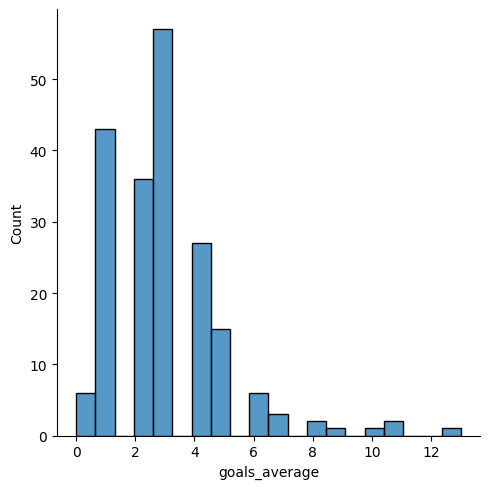

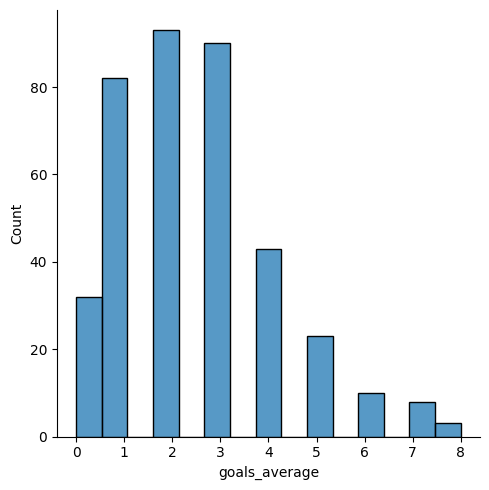

In [97]:
sns.displot(women['goals_average'])
plt.show()

sns.displot(men['goals_average'])
plt.show()

We can see that the data is right skewed

Further normality tests include: 
-Shapiro-Wilk (good for smaller datasets)

In [98]:
from scipy.stats import shapiro 
alpha = 0.05   
stat, p = shapiro(men['goals_average']) 
print(f"Men: p = {round(p,4)} test stat: {round(stat,4)}")

alpha = 0.05   
stat, p = shapiro(women['goals_average']) 
print(f"Men: p = {round(p,4)} test stat: {round(stat,4)}")


Men: p = 0.0 test stat: 0.9266
Men: p = 0.0 test stat: 0.8491


Rejects H0 -> likely not Normal

In [99]:
from scipy.stats import anderson 
result = anderson(x=men['goals_average'], dist="norm") 

print(round(result.statistic,4)) 
print(result.significance_level) 
print(result.critical_values) 

result = anderson(x=women['goals_average'], dist="norm") 

print(round(result.statistic,4)) 
print(result.significance_level) 
print(result.critical_values) 

9.1068
[15.  10.   5.   2.5  1. ]
[0.57  0.649 0.779 0.909 1.081]
7.2168
[15.  10.   5.   2.5  1. ]
[0.565 0.644 0.772 0.901 1.071]


94.4163 >= [0.575 0.655 0.786 0.917 1.091] -> Rejects H0 -> likely not Normal

3.313   >= [0.563 0.642 0.77  0.898 1.068] -> Rejects H0 -> likely not Normal

In [100]:
men['gender'] = "Male"
women['gender'] = "Female"
footbal_results = pd.concat([men, women], ignore_index=True)

footbal_results.head()

,goals_average,gender
0,1,Male
1,8,Male
2,2,Male
3,3,Male
4,1,Male


In [101]:
import pingouin

footbal_results_wide = footbal_results.pivot(columns='gender',                                      
                                            values='goals_average') 

result = pingouin.mwu(x=footbal_results_wide['Male'],               
             y=footbal_results_wide['Female'],              
             alternative='less')

In [102]:
result_dict = {
    'p_val': result['p-val'].values[0],
    'result': 'reject' if result['p-val'].values[0] < alpha else 'fail to reject'
}

result_dict

{'p_val': np.float64(0.005106609825443641), 'result': 'reject'}